# Проект «Определение перспективного тарифа для телеком-компании»

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Various_smartphones_-_Android%2C_Blackberry%2C_Windows_Phone%2C_and_iOS.jpg/640px-Various_smartphones_-_Android%2C_Blackberry%2C_Windows_Phone%2C_and_iOS.jpg 'Carlos Varela')

## Описание проекта

Имеются несколько наборов данных от федерального оператора сотовой связи «Мегалайн». Клиентам «Мегалайна» доступны два тарифа: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет необходимо установить, какой тариф приносит компании больше денег.

### Описание тарифов
#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

## Загрузка и первоначальная проверка данных

In [410]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [411]:
warnings.filterwarnings("ignore")

In [412]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (15, 5)})

In [413]:
! gdown 1Eg3R0FhQq7ABzKpTNkMApvT_hl-qQqUQ
! gdown 1WV3_Mr3g4VsjK5btjN81eRrAZzyx6rBE
! gdown 1W9V5BxZ0rdFQX8eYIIAZntGD9Z6jTUkq
! gdown 1C5i3NhvHfquIYcn9RBPBnOwc1D6jsXO7
! gdown 192Ntuw0_J6dS2lxywpnIyvCk6EW3jACC

Downloading...
From: https://drive.google.com/uc?id=1Eg3R0FhQq7ABzKpTNkMApvT_hl-qQqUQ
To: /content/calls.csv
100% 6.03M/6.03M [00:00<00:00, 62.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WV3_Mr3g4VsjK5btjN81eRrAZzyx6rBE
To: /content/internet.csv
100% 5.58M/5.58M [00:00<00:00, 210MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W9V5BxZ0rdFQX8eYIIAZntGD9Z6jTUkq
To: /content/messages.csv
100% 3.04M/3.04M [00:00<00:00, 198MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C5i3NhvHfquIYcn9RBPBnOwc1D6jsXO7
To: /content/tariffs.csv
100% 193/193 [00:00<00:00, 308kB/s]
Downloading...
From: https://drive.google.com/uc?id=192Ntuw0_J6dS2lxywpnIyvCk6EW3jACC
To: /content/users.csv
100% 37.0k/37.0k [00:00<00:00, 34.4MB/s]


In [414]:
calls = pd.read_csv('/content/calls.csv')
internet = pd.read_csv('/content/internet.csv')
messages = pd.read_csv('/content/messages.csv')
tariffs = pd.read_csv('/content/tariffs.csv')
users = pd.read_csv('/content/users.csv')

Посмотрим на только что загруженные данные.

### _calls_

In [415]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [416]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [417]:
calls.duplicated().sum()

0

Таблица _calls_ (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Видно, что колонка `call_date` имеет тип _object_ (строка в пандас). На этапе предобработки данных надо будет преобразовать её в тип _datetime_. Дубликатов и пропусков данных не обнаружено.

### _internet_

In [418]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [419]:
internet.duplicated().sum()

0

In [420]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица _internet_ (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Видно, что колонка `session_date` имеет тип _object_ (строка в пандас). На этапе предобработки данных надо будет преобразовать её в тип _datetime_. Дубликатов и пропусков данных не обнаружено.

### _messages_

In [421]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [422]:
messages.duplicated().sum()

0

In [423]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица _messages_ (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Видно, что колонка `message_date` имеет тип _object_ (строка в пандас). На этапе предобработки данных надо будет преобразовать её в тип _datetime_. Дубликатов и пропусков данных не обнаружено.

### _tariffs_

In [424]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [425]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица _tariffs_ (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### _users_

In [426]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [427]:
users.duplicated().sum()

0

In [428]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица _users_ (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Видно, что колонка `reg_date` имеет тип _object_ (строка в пандас). На этапе предобработки данных надо будет преобразовать её в тип _datetime_. В колонке `churn_date` есть довольно много пропусков; пропуск означает, что тариф действовал на момент выгрузки данных. Дубликатов данных не обнаружено.

### Предварительные выводы по загруженным данным

После загрузки и первичного просмотра данных видно, что в таблице почти не налюдается пропусков данных (за исключением стоблца `datetime` таблицы _users_. Дубликатов данных ни в одной таблице не обнаружено. 

## Предобработка данных
Посмотрим подробнее на каждую из таблиц, проведём необходимые преобразования типов данных, постараемся обнаружить возможные ошибки в данных.

### Преобразование типов данных
Начнём с преобразования типов данных. Обработаем колонки, которые мы отметили на этапе загрузки и первоначальной проверки данных.

In [429]:
calls.loc[:,'call_date'] = pd.to_datetime(calls.loc[:,'call_date'], format='%Y-%m-%d')

In [430]:
# check
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [431]:
internet.loc[:,'session_date'] = pd.to_datetime(internet.loc[:,'session_date'], format='%Y-%m-%d')

In [432]:
# check
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [433]:
messages.loc[:,'message_date'] = pd.to_datetime(messages.loc[:,'message_date'], format='%Y-%m-%d')

In [434]:
# check
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [435]:
users.loc[:,'reg_date'] = pd.to_datetime(users.loc[:,'reg_date'], format='%Y-%m-%d')

In [436]:
# check
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


После преобразования типов данных перейдём к отдельным таблицам.

### _calls_

Посмотрим на имеющиеся данные повнимательнее.

In [437]:
# ищем пропуски данных
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

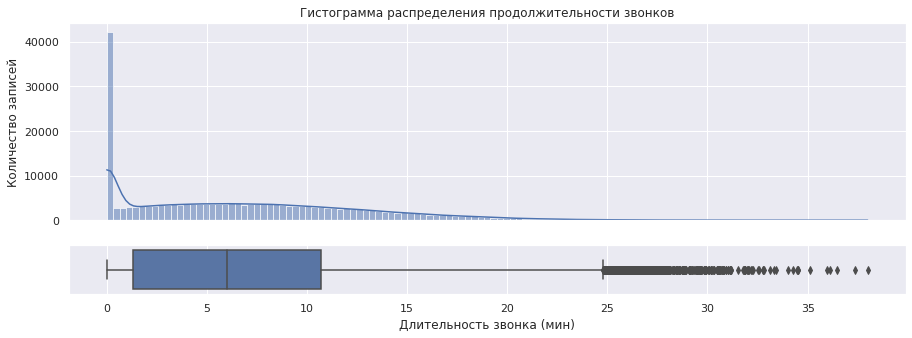

In [438]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=calls, x='duration', kde=True, ax=axs_hist)\
.set(title='Гистограмма распределения продолжительности звонков',
     ylabel='Количество записей')
sns.boxplot(data=calls, x='duration', ax=axs_box)\
.set(xlabel='Длительность звонка (мин)');

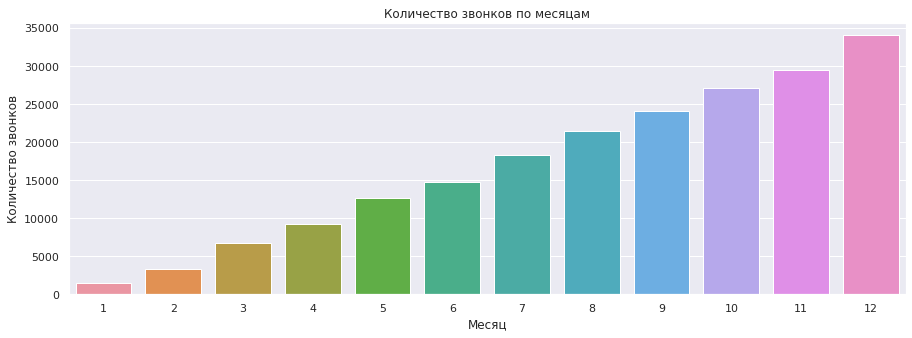

In [439]:
# вспомогательная таблица, чтобы не "засорять" оригинальную на этапе предобработки
calls_tmp = calls.copy()
calls_tmp['month'] = calls['call_date'].dt.month
sns.countplot(data=calls_tmp, x='month')\
.set(title='Количество звонков по месяцам',
     xlabel='Месяц',
     ylabel='Количество звонков');

In [440]:
calls.describe(datetime_is_numeric=True)

,call_date,duration,user_id
count,202607,202607.000000,202607.000000
mean,2018-09-02 20:01:37.583992832,6.755887,1253.940619
min,2018-01-01 00:00:00,0.000000,1000.000000
25%,2018-07-05 00:00:00,1.300000,1126.000000
50%,2018-09-17 00:00:00,6.000000,1260.000000
75%,2018-11-14 00:00:00,10.700000,1379.000000
max,2018-12-31 00:00:00,38.000000,1499.000000
std,NaN,5.843365,144.722751


После преобразования типа данных колонки `call_date` в таблице _calls_ не было выявлено ни пропусков данных, ни подозрительных значений в столбцах. В столбце `duration` обнаружено много данных с нулевым значением, что ожидаемо: нулями обозначены пропущенные звонки. 

Из графиков распределений значений видно, что число звонков росло со временем. Если в начале года данных о звонках почти нет, то в конце года их намного больше. Скорее всего это связано с тем, что в нашей таблице много данных о новых пользователях, которые подключали услуги компании в течение года. Распределение продолжительности звонков ожидаемо не симметрично, в таблице больше всего данных о коротких звонках.

### _internet_

Посмотрим на имеющиеся данные повнимательнее.

In [441]:
# ищем пропуски данных
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

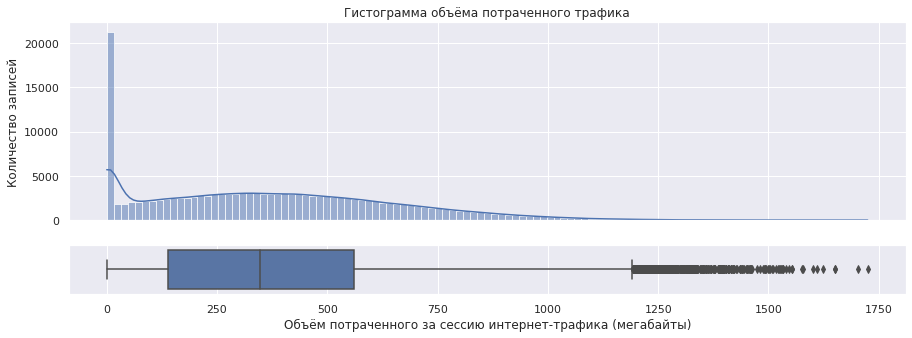

In [442]:
f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                     figsize=(15, 5), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[4,1]))
sns.histplot(data=internet, x='mb_used', kde=True, ax=axs_hist)\
.set(title='Гистограмма объёма потраченного трафика',
     ylabel='Количество записей')
sns.boxplot(data=internet, x='mb_used', ax=axs_box)\
.set(xlabel='Объём потраченного за сессию интернет-трафика (мегабайты)');

In [443]:
del internet['Unnamed: 0']

In [444]:
# check
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


После преобразования типа данных колонки `session_date` в таблице _internet_ не было выявлено ни пропусков данных, ни подозрительных значений в столбцах. Колонка `Unnamed: 0` дублировала индекс и была удалена.

Гистограмма распределения трафика не симметрична, скошена вправо. Видно, что большинство сессий были относительно небольшими по объёму трафика. Видна ярко выраженная мода в районе нуля. 

### _messages_

Посмотрим на имеющиеся данные повнимательнее.

In [445]:
# ищем пропуски данных
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [446]:
messages.describe(datetime_is_numeric=True)

,message_date,user_id
count,123036,123036.000000
mean,2018-09-04 15:28:42.227640576,1256.989410
min,2018-01-02 00:00:00,1000.000000
25%,2018-07-09 00:00:00,1134.000000
50%,2018-09-20 00:00:00,1271.000000
75%,2018-11-14 00:00:00,1381.000000
max,2018-12-31 00:00:00,1499.000000
std,NaN,143.523967


Пропусков данных и подозрительных значений в таблице _messages_ не выявлено.

### _tariffs_

In [447]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Пропусков данных и подозрительных значений в таблице _tariffs_ не выявлено.

### _users_

In [448]:
users.describe(datetime_is_numeric=True)

,user_id,age,reg_date
count,500.000000,500.00000,500
mean,1249.500000,46.58800,2018-06-30 18:57:35.999999744
min,1000.000000,18.00000,2018-01-01 00:00:00
25%,1124.750000,32.00000,2018-04-07 12:00:00
50%,1249.500000,46.00000,2018-07-02 12:00:00
75%,1374.250000,62.00000,2018-09-29 00:00:00
max,1499.000000,75.00000,2018-12-31 00:00:00
std,144.481833,16.66763,NaN


Начнём с колонки _churn_date_, в которой было замечено много пропусков данных.

In [449]:
users.churn_date.unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

In [450]:
users.loc[:,'churn_date'] = pd.to_datetime(users.loc[:,'churn_date'], format='%Y-%m-%d')

In [451]:
users.churn_date.describe(datetime_is_numeric=True)

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

In [452]:
users.churn_date.isna().sum()

462

Итак, в колонке 462 записи с пропусками данных и 38 записей без пропусков. Для очистки совести убедимся, что все заполненные значения `churn_date` (дата прекращения пользования тарифом) больше, чем значения `reg_date` (дата подключения тарифа).

In [453]:
users.query('churn_date < reg_date').loc[:,'churn_date'].count()

0

Подобных значений не обнаружено. Посмотрим на колонку `city`.

In [454]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Неявных дубликатов не видно, данные выглядят хорошо.

In [455]:
users.city.value_counts().head().to_frame()

,city
Москва,99
Санкт-Петербург,39
Новосибирск,16
Омск,14
Казань,14


Видно, что большинство пользователей проживают в крупных городах.

In [456]:
users.reg_date.describe(datetime_is_numeric=True)

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

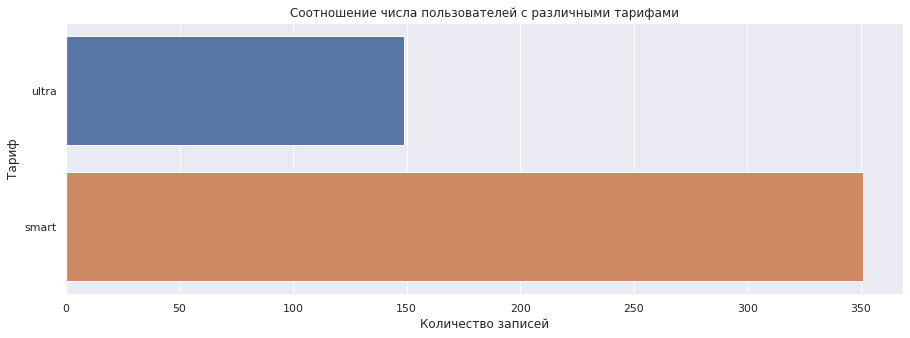

In [457]:
sns.countplot(data=users, y='tariff')\
.set(xlabel='Количество записей',
     ylabel='Тариф',
     title='Соотношение числа пользователей с различными тарифами');

После преобразования типов данных проблем в таблице _users_ не выявлено. Было установлено, что в таблице содержатся данные о пользователях, проживающих в 76 городах, в основном — в крупных. Большая часть пользователей подключена к тарифу _smart_.

### Итог
Была произведена предварительная обработка данных. Для некоторых колонок была произведена замена типа данных на _datetime_, что в дальнейшем позволит производить обработку более эффективно. Пропуски данных были обнаружены лишь в таблице _users_, причина этих пропусков известна и приведена в описании соответствующего столбца. Других проблем в данных выявлено не было.

## Расчёт вспомогательных данных

Добавим в таблицы _calls_, _messages_, _internet_ дополнительные колонки с месяцами совершённых звонков, отправленных сообщений и сессий пользования интернетом.

In [458]:
calls.loc[:, 'month'] = calls.call_date.dt.month

In [459]:
# check
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [460]:
messages.loc[:, 'month'] = messages.message_date.dt.month

In [461]:
# check
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [462]:
internet.loc[:, 'month'] = internet.session_date.dt.month

In [463]:
# check
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


### Количество звонков и израсходованных минут

Для каждого пользователя посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам.

Создадим дополнительную таблицу, где для каждого пользователя покажем количество сделанных звонков по месяцам. Если пользователь не совершал звонков в определённом месяце, значение будет пропущено (NaN).

In [464]:
calls_months_count = calls.pivot_table(index='user_id', 
                                       columns='month', 
                                       values='duration', 
                                       aggfunc='count')#.fillna(value=0)

In [465]:
calls_months_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


In [466]:
calls_months_count.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,43.000000,82.000000,114.000000,165.000000,205.000000,244.000000,289.000000,337.000000,370.000000,411.000000,444.000000,470.000000
mean,34.325581,40.585366,58.657895,56.193939,61.692683,60.311475,63.314879,63.762611,65.029730,66.048662,66.443694,72.312766
std,29.009621,30.509643,33.444136,29.649353,31.609570,29.889256,32.153405,31.838366,32.240823,32.797569,31.018803,34.525385
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
25%,12.500000,16.250000,34.000000,37.000000,40.000000,40.000000,41.000000,40.000000,42.000000,43.000000,44.000000,47.250000
50%,28.000000,33.000000,58.500000,54.000000,63.000000,61.000000,62.000000,64.000000,64.000000,65.000000,65.000000,68.000000
75%,50.500000,62.000000,76.000000,78.000000,80.000000,77.250000,82.000000,83.000000,83.000000,83.500000,86.000000,91.000000
max,128.000000,125.000000,203.000000,152.000000,168.000000,176.000000,185.000000,188.000000,180.000000,196.000000,182.000000,244.000000


Похоже, что больше всего звонков пользователи совершали в декабре. Наверное поздравляли друг друга с наступающими праздниками)

Создадим дополнительную таблицу, где для каждого пользователя покажем количество израсходованных минут по месяцам. Каждый звонок округлим в большую сторону до минуты. Если пользователь не совершал звонков в определённом месяце, значение будет пропущено (NaN).

In [467]:
calls['round'] = calls['duration'].apply(np.ceil) # округляем в большую сторону
calls_months_length = calls.pivot_table(index='user_id', 
                                        columns='month', 
                                        values='round', 
                                        aggfunc='sum')#.fillna(value=0)

In [468]:
calls_months_length.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


In [469]:
calls_months_length.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,43.000000,82.000000,114.000000,165.000000,205.000000,244.000000,289.000000,337.000000,370.000000,411.000000,444.000000,470.000000
mean,250.790698,298.231707,422.377193,401.878788,433.219512,431.065574,455.868512,456.077151,468.851351,471.844282,473.173423,518.457447
std,202.662464,224.919591,249.890539,216.896395,227.325511,224.706731,232.029415,232.011597,236.461808,239.673447,225.534698,249.583212
min,0.000000,0.000000,13.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,9.000000,6.000000,9.000000
25%,87.500000,103.750000,237.250000,247.000000,284.000000,272.750000,295.000000,297.000000,302.250000,310.500000,314.000000,343.250000
50%,230.000000,238.500000,407.500000,389.000000,449.000000,425.500000,454.000000,450.000000,456.500000,451.000000,462.500000,492.500000
75%,364.500000,460.250000,549.250000,550.000000,561.000000,564.750000,589.000000,600.000000,597.750000,596.500000,603.250000,645.000000
max,861.000000,919.000000,1609.000000,1096.000000,1232.000000,1410.000000,1311.000000,1321.000000,1297.000000,1401.000000,1257.000000,1673.000000


В декабре пользователи не только в среднем звонили чаще, но и общались дольше!

### Количество отправленных сообщений

Рассчитаем для каждого пользователя количество отправленных сообщений по месяцам.

Создадим дополнительную таблицу, где для каждого пользователя покажем количество отправленных сообщений по месяцам. Если пользователь не отправлял сообщений в определённом месяце, значение будет пропущено (NaN).

In [470]:
messages_month_count = messages.pivot_table(index='user_id', 
                                            columns='month', 
                                            values='id', 
                                            aggfunc='count')#.fillna(value=0)

In [471]:
messages_month_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [472]:
messages_month_count.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,38.000000,66.000000,94.000000,135.000000,174.000000,209.000000,247.000000,292.000000,318.000000,357.000000,383.000000,404.000000
mean,24.315789,29.151515,38.808511,38.362963,41.942529,42.980861,45.829960,44.821918,46.411950,47.938375,47.634465,50.878713
std,20.328525,22.390412,31.475977,27.963891,30.438550,33.933187,35.483699,35.010982,34.339419,37.584760,36.116624,38.122991
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.250000,9.000000,15.000000,17.000000,20.250000,19.000000,20.000000,19.000000,21.000000,19.000000,20.000000,21.000000
50%,22.000000,24.500000,28.500000,33.000000,36.500000,34.000000,39.000000,37.000000,39.000000,40.000000,39.000000,43.500000
75%,31.500000,45.000000,57.000000,54.000000,57.000000,58.000000,61.500000,62.250000,64.750000,69.000000,67.500000,71.000000
max,75.000000,90.000000,155.000000,143.000000,148.000000,201.000000,211.000000,180.000000,188.000000,223.000000,197.000000,224.000000


Видно, что в декабре пользователи в среднем отправляли больше всего сообщений.

### Объём израсходованного интернет-трафика

Рассчитаем объём израсходованного интернет-трафика по месяцам для каждого пользователя.

Создадим дополнительную таблицу, где для каждого пользователя покажем объём израсходованного трафика по месяцам. Если пользователь не пользовался интернетом в определённом месяце, значение будет пропущено (NaN).

In [473]:
internet['gb_round'] = internet['mb_used'].div(1024).apply(np.ceil) # перегоняем в Гб и округляем в большую сторону
internet_month_volume = internet.pivot_table(index='user_id', 
                                            columns='month', 
                                            values='gb_round', 
                                            aggfunc='sum')#.fillna(value=0)

In [474]:
internet_month_volume.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,4.0,49.0,28.0,27.0,26.0,28.0,27.0,19.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,35.0
1002,NaN,NaN,NaN,NaN,NaN,27.0,45.0,50.0,44.0,36.0,45.0,52.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,23.0,28.0,20.0,21.0
1004,NaN,NaN,NaN,NaN,26.0,35.0,36.0,53.0,32.0,37.0,34.0,38.0


In [475]:
internet_month_volume.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,43.000000,80.0000,114.000000,167.000000,207.000000,247.000000,291.000000,340.000000,374.000000,416.000000,449.000000,475.000000
mean,22.744186,28.7500,38.043860,34.742515,40.420290,39.914980,41.278351,41.991176,41.312834,42.507212,42.844098,45.976842
std,15.301872,17.0067,17.667725,16.339753,16.395067,15.644841,16.217323,16.252340,14.937080,16.117190,15.706792,16.173163
min,1.000000,1.0000,4.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.000000
25%,10.500000,13.7500,24.000000,23.000000,31.000000,29.000000,31.000000,32.000000,32.250000,34.000000,34.000000,37.000000
50%,22.000000,29.5000,39.000000,36.000000,42.000000,41.000000,42.000000,43.000000,41.000000,44.000000,43.000000,46.000000
75%,31.500000,40.0000,52.000000,47.000000,50.000000,50.000000,52.000000,52.250000,52.000000,52.000000,53.000000,54.500000
max,53.000000,68.0000,69.000000,73.000000,94.000000,81.000000,85.000000,98.000000,79.000000,94.000000,99.000000,101.000000


В декабре пользователи в среднем пользовались интеренетом больше всего.

### Помесячная выручка с каждого пользователя

Рассчитаем помесячную выручку с каждого пользователя. Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

#### Звонки
Возьмём таблицу _calls_months_length_ и рассчитаем по ней помесячную стоимость звонков, превышающих лимит по тарифу для каждого пользователя. Если пользователь не исчерпал лимит звонокв — запишем в таблицу ноль, в противном случае — стоимость дополнительных минут по тарифному плану со знаком минус.

In [476]:
calls_months_length = calls_months_length.join(users[['user_id', 'tariff']].set_index('user_id'))

In [477]:
calls_months_length.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,smart
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,ultra
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


In [478]:
extra_minutes_ruble_smart = calls_months_length.loc[calls_months_length['tariff'] == 'smart',:].copy()
extra_minutes_ruble_smart.loc[:,1:12] -= int(tariffs.loc[tariffs['tariff_name']=="smart", 'minutes_included'])
extra_minutes_ruble_smart.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="smart", 'rub_per_minute'])

In [479]:
extra_minutes_ruble_smart.loc[:,1:12] = extra_minutes_ruble_smart.loc[:,1:12].where(extra_minutes_ruble_smart.loc[:,1:12] > 0, 0)

In [480]:
extra_minutes_ruble_smart.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
1005,0.0,0.0,318.0,636.0,285.0,336.0,207.0,357.0,0.0,669.0,141.0,276.0,smart
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
1007,0.0,0.0,0.0,0.0,0.0,135.0,231.0,0.0,465.0,0.0,240.0,0.0,smart


In [481]:
extra_minutes_ruble_ultra = calls_months_length.loc[calls_months_length['tariff'] == 'ultra',:].copy()
extra_minutes_ruble_ultra.loc[:,1:12] -= int(tariffs.loc[tariffs['tariff_name']=="ultra", 'minutes_included'])
extra_minutes_ruble_ultra.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="ultra", 'rub_per_minute'])

In [482]:
extra_minutes_ruble_ultra.loc[:,1:12] = extra_minutes_ruble_ultra.loc[:,1:12].where(extra_minutes_ruble_ultra.loc[:,1:12] > 0, 0)

In [483]:
extra_minutes_ruble_ultra.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra


#### Сообщения
Возьмём таблицу _messages_month_count_ и рассчитаем по ней помесячную стоимость сообщений, превышающих лимит по тарифу для каждого пользователя. Если пользователь не исчерпал лимит сообщений — запишем в таблицу ноль, в противном случае — стоимость дополнительных сообщений по тарифному плану со знаком минус.

In [484]:
messages_month_count = messages_month_count.join(users[['user_id', 'tariff']].set_index('user_id'))

In [485]:
messages_month_count.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,ultra
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,smart


In [486]:
extra_messages_ruble_smart = messages_month_count.loc[messages_month_count['tariff'] == 'smart',:].copy()
extra_messages_ruble_smart.loc[:,1:12] -= int(tariffs.loc[tariffs['tariff_name']=="smart", 'messages_included'])
extra_messages_ruble_smart.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="smart", 'rub_per_message'])

In [487]:
extra_messages_ruble_smart.loc[:,1:12] = \
extra_messages_ruble_smart.loc[:,1:12].where(extra_messages_ruble_smart.loc[:,1:12] > 0, 0)

In [488]:
extra_messages_ruble_smart.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
1005,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0,smart
1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,smart
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart


In [489]:
extra_messages_ruble_ultra = messages_month_count.loc[messages_month_count['tariff'] == 'ultra',:].copy()
extra_messages_ruble_ultra.loc[:,1:12] -= int(tariffs.loc[tariffs['tariff_name']=="ultra", 'messages_included'])
extra_messages_ruble_ultra.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="ultra", 'rub_per_message'])

In [490]:
extra_messages_ruble_ultra.loc[:,1:12] = \
extra_messages_ruble_ultra.loc[:,1:12].where(extra_messages_ruble_ultra.loc[:,1:12] > 0, 0)

In [491]:
extra_messages_ruble_ultra.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra


#### Интернет
Возьмём таблицу _internet_month_volume_ и рассчитаем по ней помесячную стоимость сессий, превышающих лимит по тарифу для каждого пользователя. Если пользователь не исчерпал лимит сессий — запишем в таблицу ноль, в противном случае - стоимость дополнительных сессий по тарифному плану со знаком минус.

In [492]:
internet_month_volume = internet_month_volume.join(users[['user_id', 'tariff']].set_index('user_id'))

In [493]:
extra_internet_ruble_smart = internet_month_volume.loc[internet_month_volume['tariff'] == 'smart',:].copy()
extra_internet_ruble_smart.loc[:,1:12] -= \
int(tariffs.loc[tariffs['tariff_name']=="smart", 'mb_per_month_included'])/1024
#extra_internet_ruble_smart.loc[:,1:12] /= 1024
#extra_internet_ruble_smart.loc[:,1:12] = extra_internet_ruble_smart.loc[:,1:12].apply(np.ceil)
extra_internet_ruble_smart.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="smart", 'rub_per_gb'])

In [494]:
extra_internet_ruble_smart.loc[:,1:12] = \
extra_internet_ruble_smart.loc[:,1:12].where(extra_internet_ruble_smart.loc[:,1:12] > 0, 0)

In [495]:
extra_internet_ruble_smart.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6400.0,4000.0,smart
1002,0.0,0.0,0.0,0.0,0.0,2400.0,6000.0,7000.0,5800.0,4200.0,6000.0,7400.0,smart
1005,0.0,1400.0,2000.0,1800.0,1000.0,1800.0,800.0,800.0,1200.0,800.0,2600.0,1800.0,smart
1006,0.0,0.0,5600.0,3600.0,4600.0,3800.0,7200.0,6200.0,5000.0,6800.0,2800.0,6000.0,smart
1007,0.0,0.0,0.0,600.0,6400.0,4400.0,7000.0,7200.0,4000.0,4800.0,5000.0,4600.0,smart


In [496]:
extra_internet_ruble_ultra = internet_month_volume.loc[internet_month_volume['tariff'] == 'ultra',:].copy()
extra_internet_ruble_ultra.loc[:,1:12] -= \
int(tariffs.loc[tariffs['tariff_name']=="ultra", 'mb_per_month_included'])/1024
#extra_internet_ruble_ultra.loc[:,1:12] /= 1024
#extra_internet_ruble_ultra.loc[:,1:12] = extra_internet_ruble_ultra.loc[:,1:12].apply(np.ceil)
extra_internet_ruble_ultra.loc[:,1:12] *= int(tariffs.loc[tariffs['tariff_name']=="ultra", 'rub_per_gb'])

In [497]:
extra_internet_ruble_ultra.loc[:,1:12] = \
extra_internet_ruble_ultra.loc[:,1:12].where(extra_internet_ruble_ultra.loc[:,1:12] > 0, 0)

In [498]:
extra_internet_ruble_ultra.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,2850.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra
1004,0.0,0.0,0.0,0.0,0.0,750.0,900.0,3450.0,300.0,1050.0,600.0,1200.0,ultra
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.0,ultra
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,ultra


#### Общие расходы
Обобщим расходы за дополнительные минуты, сообщения и гигабайты, добавим абонентскую плату

In [499]:
total_smart = extra_minutes_ruble_smart.copy()
total_smart.loc[:,1:12] = total_smart.loc[:,1:12].add(extra_messages_ruble_smart.loc[:,1:12], fill_value=0)
total_smart.loc[:,1:12] = total_smart.loc[:,1:12].add(extra_internet_ruble_smart.loc[:,1:12], fill_value=0)
total_smart.loc[:,1:12] += int(tariffs.loc[tariffs['tariff_name']=="smart", 'rub_monthly_fee'])

In [500]:
total_ultra = extra_minutes_ruble_ultra.copy()
total_ultra.loc[:,1:12] = total_ultra.loc[:,1:12].add(extra_messages_ruble_ultra.loc[:,1:12], fill_value=0)
total_ultra.loc[:,1:12] = total_ultra.loc[:,1:12].add(extra_internet_ruble_ultra.loc[:,1:12], fill_value=0)
total_ultra.loc[:,1:12] += int(tariffs.loc[tariffs['tariff_name']=="ultra", 'rub_monthly_fee'])

In [501]:
total = pd.concat([total_ultra, total_smart]).sort_values(by='user_id')

In [502]:
total = total.join(users[['user_id', 'reg_date', 'churn_date']].set_index('user_id'))

In [503]:
total['reg_month'] = total['reg_date'].dt.month
total['churn_month'] = total['churn_date'].dt.month

In [504]:
del total['reg_date']
del total['churn_date']

In [505]:
total['churn_month'] = total['churn_month'].fillna(value=12) # грубо, но работает

In [506]:
def remove_extra(row):
    for i in range(1,13):
        if not (i >= row['reg_month']) & (i <= row['churn_month']):
            row[i] = 0
    return row

In [507]:
total = total.apply(remove_extra, axis=1)
del total['reg_month']
del total['churn_month']

In [508]:
total.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,1950.0,4800.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6950.0,4550.0,smart
1002,0.0,0.0,0.0,0.0,0.0,2950.0,6550.0,7550.0,6350.0,4750.0,6550.0,7950.0,smart
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
1004,0.0,0.0,0.0,0.0,1950.0,2700.0,2850.0,5400.0,2250.0,3000.0,2550.0,3150.0,ultra


In [509]:
total.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,220.782520,599.697154,1171.699187,1486.008130,2223.981707,2587.924797,3192.813008,3868.780488,4159.016260,4819.241870,5238.217480,6109.786585
std,965.899211,1674.311539,2540.969983,2570.277829,3188.868699,3232.717266,3459.186427,3547.729742,3308.309302,3428.054871,3252.467369,3287.841292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000,1950.000000,2310.000000,3929.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,3500.000000,4199.000000,4886.000000,5446.000000,6144.500000
75%,0.000000,0.000000,0.000000,1950.000000,4650.000000,5162.500000,6227.000000,6750.000000,6750.000000,7411.750000,7750.000000,7958.000000
max,8150.000000,11432.000000,11521.000000,11350.000000,12550.000000,13673.000000,12550.000000,15550.000000,12150.000000,15431.000000,18280.000000,19370.000000


#### Вывод
Итак, мы посчитали общие расходы для всех пользователей. Теперь в нашем распоряжении есть три таблицы: отдельная таблица расходов по месяцам для пользователей тарифа _smart_, отдельная для тарифа _ultra_ и общая таблица расходов.

## Анализ данных

Проанализируем поведение пользователей каждого из тарифов. Начнём с тарифа _smart_.

### Пользователи тарифа _Smart_

#### Звонки
Начнём с того, что узнаем, сколько в среднем разговаривает по телефону пользователь тарифа _smart_ в месяц.

In [510]:
calls_months_length.query('tariff=="smart"').mean(axis=1).mean().round()

421.0

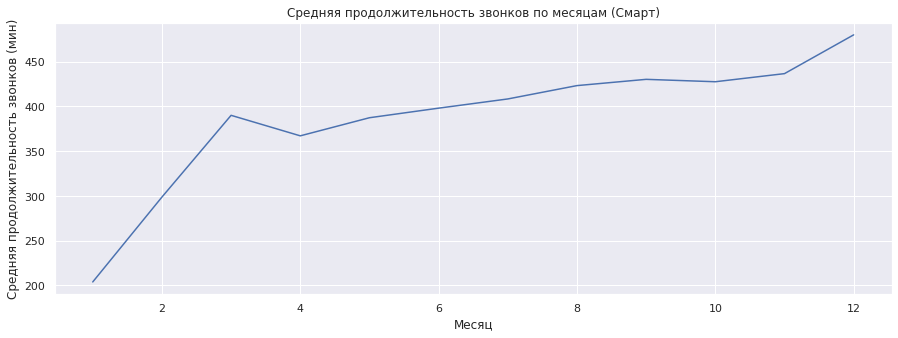

In [511]:
sns.lineplot(data=calls_months_length\
             .query('tariff=="smart"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Средняя продолжительность звонков (мин)',
     title='Средняя продолжительность звонков по месяцам (Смарт)');

In [512]:
calls_months_length.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0,smart
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0,ultra
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0,ultra


In [513]:
calls_months_length.query('tariff=="smart"').mean(axis=1).var().round()

20585.0

In [514]:
calls_months_length.query('tariff=="smart"').mean(axis=1).std().round()

143.0

Промежуточный итог: в среднем пользователь тарифа _smart_ разговаривает по телефону 421 минуту в месяц. Дисперсия средних продолжительностей разговоров в месяц — 20585, стандартное отклонение средних продолжительностей разговора в месяц — 143.

#### Сообщения

In [515]:
messages_month_count.query('tariff=="smart"').mean(axis=1).mean().round()

38.0

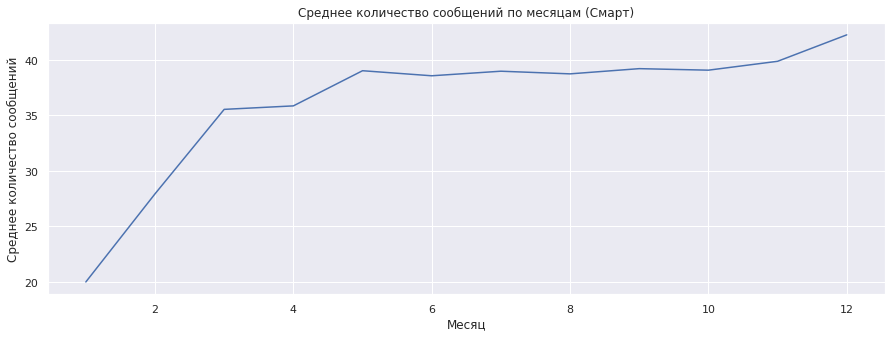

In [516]:
sns.lineplot(data=messages_month_count\
             .query('tariff=="smart"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Среднее количество сообщений',
     title='Среднее количество сообщений по месяцам (Смарт)');

In [517]:
messages_month_count.query('tariff=="smart"').mean(axis=1).var().round()

618.0

In [518]:
messages_month_count.query('tariff=="smart"').mean(axis=1).std().round()

25.0

Промежуточный итог: в среднем пользователь тарифа _smart_ отправляет 38 сообщений в месяц. Дисперсия среднего количества сообщений в месяц — 618, стандартное отклонение — 25.

#### Интернет

In [519]:
internet_month_volume.query('tariff=="smart"').mean(axis=1).mean().round()

42.0

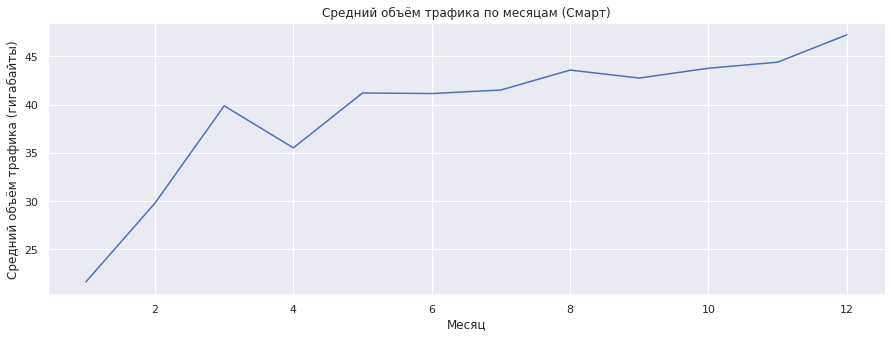

In [520]:
sns.lineplot(data=internet_month_volume\
             .query('tariff=="smart"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Средний объём трафика (гигабайты)',
     title='Средний объём трафика по месяцам (Смарт)');

In [521]:
internet_month_volume.query('tariff=="smart"').mean(axis=1).var().round()

84.0

In [522]:
internet_month_volume.query('tariff=="smart"').mean(axis=1).std().round()

9.0

Промежуточный итог: в среднем пользователь тарифа _smart_ потребляет 42 гигабайта интернета в месяц. Дисперсия среднего объёма трафика — 84, стандартное отклонение — 9.

### Пользователи тарифа _Ultra_

#### Звонки
Начнём с того, что узнаем, сколько в среднем разговаривает по телефону пользователь тарифа _ultra_ в месяц.

In [523]:
calls_months_length.query('tariff=="ultra"').mean(axis=1).mean().round()

547.0

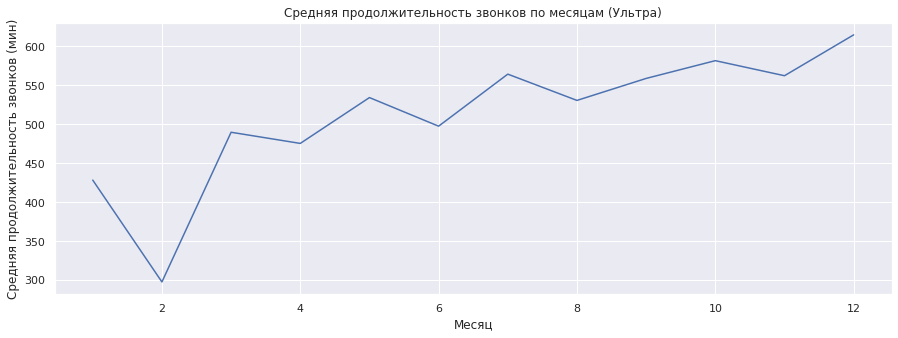

In [524]:
sns.lineplot(data=calls_months_length\
             .query('tariff=="ultra"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Средняя продолжительность звонков (мин)',
     title='Средняя продолжительность звонков по месяцам (Ультра)');

In [525]:
calls_months_length.query('tariff=="ultra"').mean(axis=1).var().round()

72005.0

In [526]:
calls_months_length.query('tariff=="ultra"').mean(axis=1).std().round()

268.0

Промежуточный итог: в среднем пользователь тарифа _ultra_ разговаривает по телефону 547 минут в месяц. Дисперсия средних продолжительностей разговоров в месяц — 72005, стандартное отклонение средних продолжительностей разговора в месяц — 268.

#### Сообщения

In [527]:
messages_month_count.query('tariff=="ultra"').mean(axis=1).mean().round()

65.0

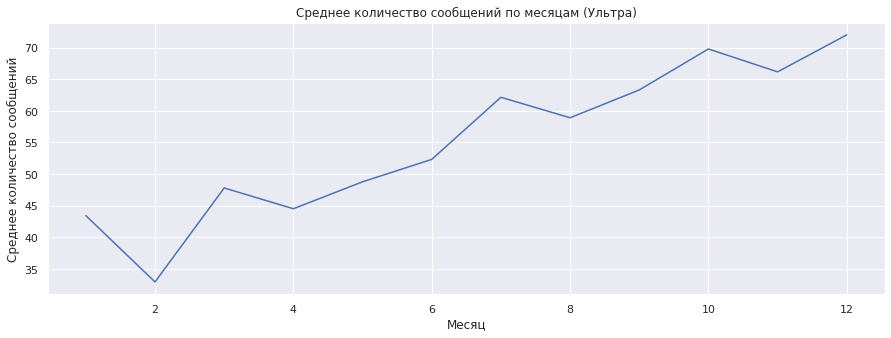

In [528]:
sns.lineplot(data=messages_month_count\
             .query('tariff=="ultra"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Среднее количество сообщений',
     title='Среднее количество сообщений по месяцам (Ультра)');

In [529]:
messages_month_count.query('tariff=="ultra"').mean(axis=1).var().round()

1883.0

In [530]:
messages_month_count.query('tariff=="ultra"').mean(axis=1).std().round()

43.0

Промежуточный итог: в среднем пользователь тарифа _ultra_ отправляет 65 сообщений в месяц. Дисперсия среднего количества сообщений в месяц — 1883, стандартное отклонение — 43.

#### Интернет

In [531]:
internet_month_volume.query('tariff=="ultra"').mean(axis=1).mean().round()

39.0

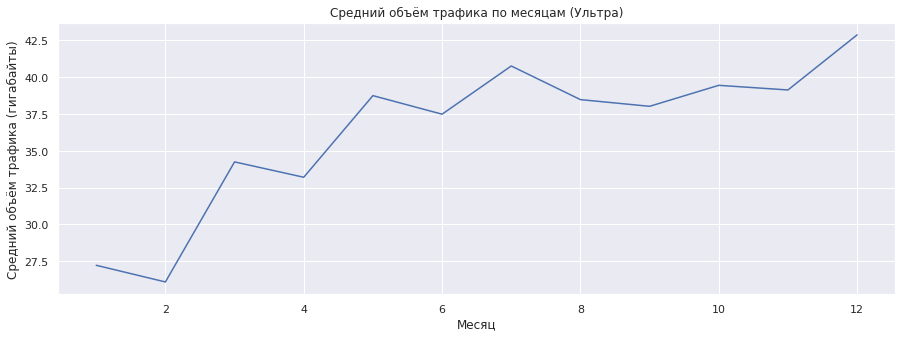

In [532]:
sns.lineplot(data=internet_month_volume\
             .query('tariff=="ultra"').loc[:,1:12].mean())\
.set(xlabel='Месяц',
     ylabel='Средний объём трафика (гигабайты)',
     title='Средний объём трафика по месяцам (Ультра)');

In [533]:
internet_month_volume.query('tariff=="ultra"').mean(axis=1).var().round()

253.0

In [534]:
internet_month_volume.query('tariff=="ultra"').mean(axis=1).std().round()

16.0

Промежуточный итог: в среднем пользователь тарифа _ultra_ потребляет 39 гигабайт интернета в месяц. Дисперсия среднего объёма трафика — 253, стандартное отклонение — 16.

### Графическое сравнение пользователей тарифов
#### Звонки
Сравним, как суммарная длительность звонков в месяц различается для пользователей различных тарифов.

In [535]:
calls_2 = pd.merge(calls, users[['user_id', 'tariff']])

In [536]:
calls_2_smart = calls_2.query('tariff=="smart"')

In [537]:
calls_2_smart = calls_2_smart.groupby(['user_id', 'month']).agg({'duration': 'sum'})

In [538]:
calls_2_ultra = calls_2.query('tariff=="ultra"')

In [539]:
calls_2_ultra = calls_2_ultra.groupby(['user_id', 'month']).agg({'duration': 'sum'})

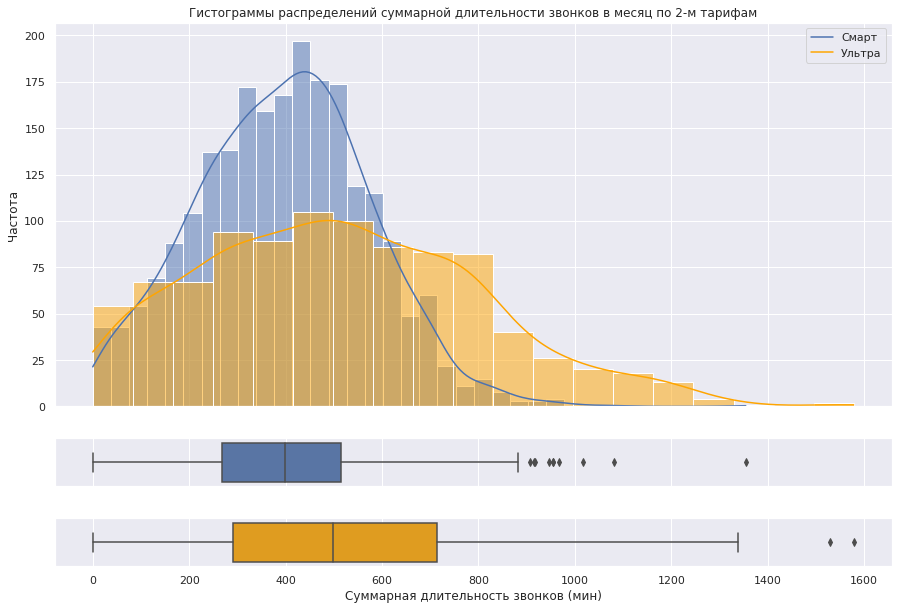

In [540]:
f, [axs_hist, axs_box1, axs_box2] = plt.subplots(3, 1,
                                     figsize=(15, 10), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[8,1,1]))

sns.histplot(data=calls_2_smart['duration'], ax=axs_hist, kde=True)
hist = sns.histplot(data=calls_2_ultra['duration'], ax=axs_hist, 
                    color='orange', kde=True)
hist.set(title='Гистограммы распределений суммарной длительности звонков в месяц по 2-м тарифам',
     ylabel='Частота')

hist.legend(labels=['Смарт','Ультра'])

bp = sns.boxplot(data=calls_2_smart, orient='h', ax=axs_box1)
bp.set_yticklabels([])

bp = sns.boxplot(data=calls_2_ultra, orient='h', ax=axs_box2, color='orange')

bp.set(xlabel='Суммарная длительность звонков (мин)')
bp.set_yticklabels([]);

Из построенного графика видно, что пользователи тарифа _ultra_ чаще дольше общаются по телефону (у оранжевого графика более длинный правый хвост). Моды обоих графиков расположены близко, но мода графика _smart_ значительно выше.

#### Сообщения
Сравним, как количество отправляемых сообщений различается для пользователей различных тарифов.

In [541]:
messages_2 = pd.merge(messages, users[['user_id', 'tariff']])

In [542]:
messages_2_smart = messages_2.query('tariff=="smart"')

In [543]:
messages_2_smart = messages_2_smart.groupby(['user_id', 'month']).agg({'message_date': 'count'})

In [544]:
messages_2_ultra = messages_2.query('tariff=="ultra"')

In [545]:
messages_2_ultra = messages_2_ultra.groupby(['user_id', 'month']).agg({'message_date': 'count'})

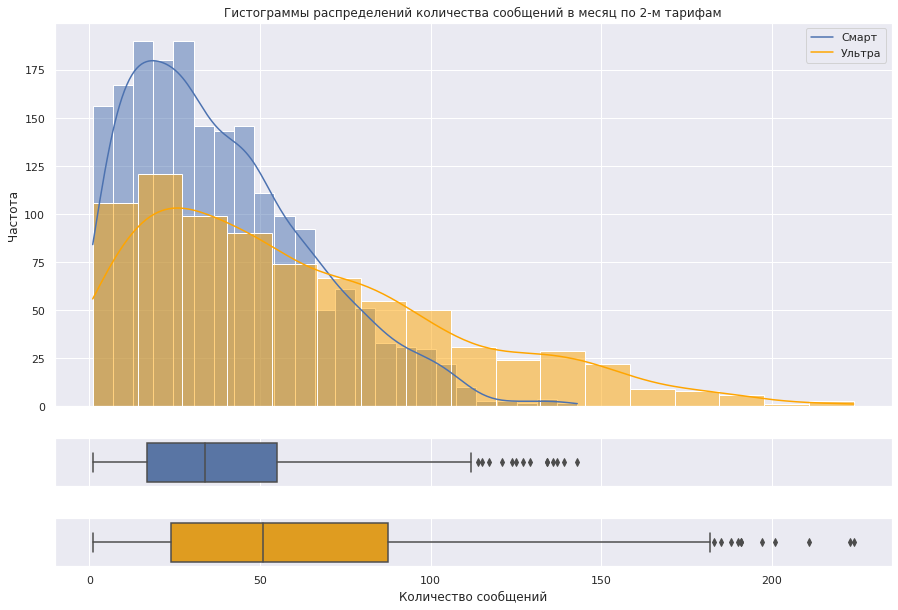

In [546]:
f, [axs_hist, axs_box1, axs_box2] = plt.subplots(3, 1,
                                     figsize=(15, 10), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[8,1,1]))

sns.histplot(data=messages_2_smart['message_date'], ax=axs_hist, kde=True)
hist = sns.histplot(data=messages_2_ultra['message_date'], ax=axs_hist, 
                    color='orange', kde=True)
hist.set(title='Гистограммы распределений количества сообщений в месяц по 2-м тарифам',
     ylabel='Частота')

hist.legend(labels=['Смарт','Ультра'])

bp = sns.boxplot(data=messages_2_smart, orient='h', ax=axs_box1)
bp.set_yticklabels([])

bp = sns.boxplot(data=messages_2_ultra, orient='h', ax=axs_box2, color='orange')

bp.set(xlabel='Количество сообщений')
bp.set_yticklabels([]);

Из построенного графика видно, что пользователи тарифа _ultra_ чаще, чем пользователи тарифа _smart_, отправляют большое количество сообщений в месяц (у оранжевого графика более длинный правый хвост).

#### Интернет
Сравним, как суммарный месячный объём трафика различается для пользователей различных тарифов.

In [547]:
internet_2 = pd.merge(internet, users[['user_id', 'tariff']])

In [548]:
internet_2_smart = internet_2.query('tariff=="smart"')

In [549]:
internet_2_smart = internet_2_smart.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [550]:
internet_2_ultra = internet_2.query('tariff=="ultra"')

In [551]:
internet_2_ultra = internet_2_ultra.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

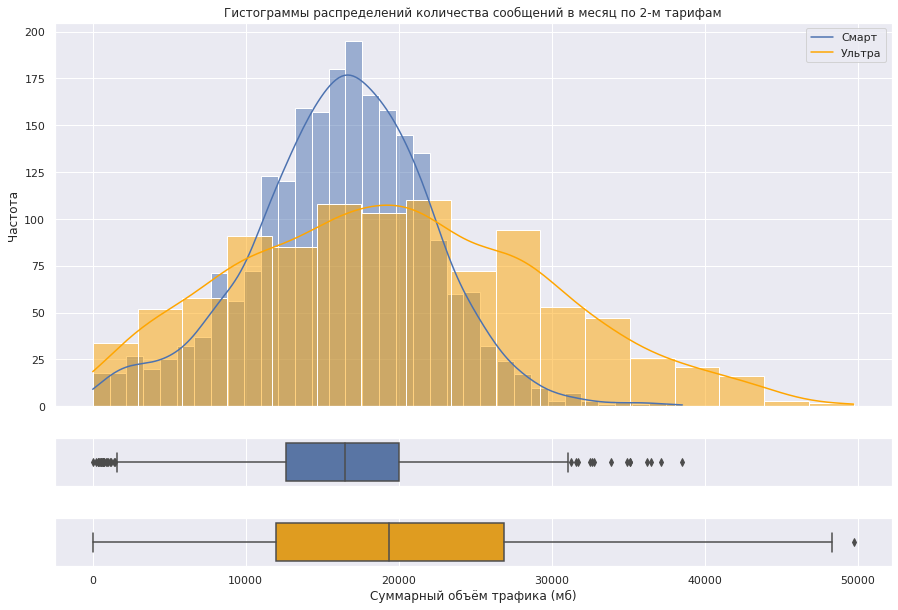

In [552]:
f, [axs_hist, axs_box1, axs_box2] = plt.subplots(3, 1,
                                     figsize=(15, 10), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[8,1,1]))

sns.histplot(data=internet_2_smart['mb_used'], ax=axs_hist, kde=True)
hist = sns.histplot(data=internet_2_ultra['mb_used'], ax=axs_hist, 
                    color='orange', kde=True)
hist.set(title='Гистограммы распределений количества сообщений в месяц по 2-м тарифам',
     ylabel='Частота')

hist.legend(labels=['Смарт','Ультра'])

bp = sns.boxplot(data=internet_2_smart, orient='h', ax=axs_box1)
bp.set_yticklabels([])

bp = sns.boxplot(data=internet_2_ultra, orient='h', ax=axs_box2, color='orange')

bp.set(xlabel='Суммарный объём трафика (мб)')
bp.set_yticklabels([]);

Из построенных графиков видно, что суммарный объём трафика для пользователей обоих тарифов распределён почти симметрично, левые "хвосты" в обоих случаях "срезаны" в нуле. Графики напоминают нормальное распределение, что не может не радовать. 

#### Выручка
Сравним, как суммарная выручка в месяц различается для пользователей различных тарифов.

In [553]:
total_smart = total.query('tariff=="smart"')
total_ultra = total.query('tariff=="ultra"')

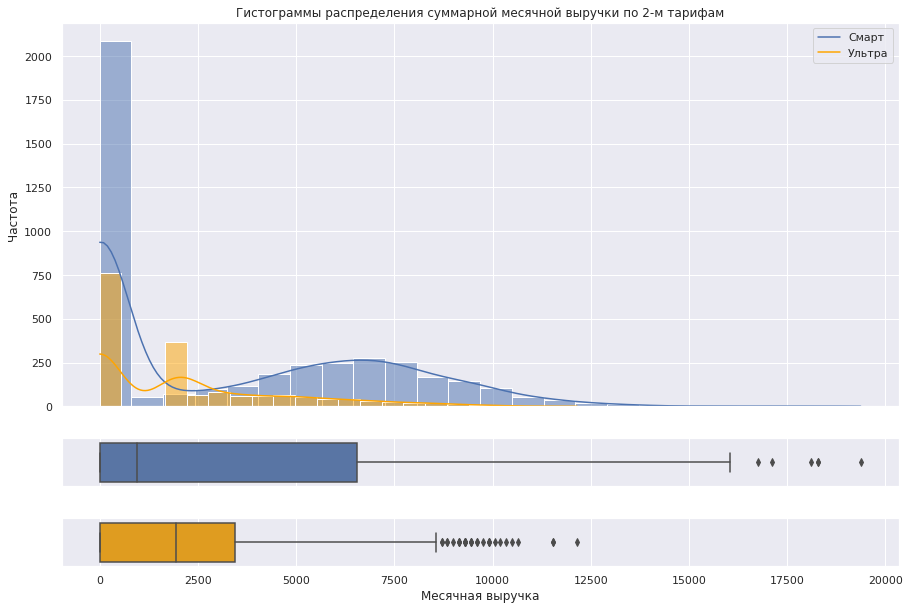

In [554]:
f, [axs_hist, axs_box1, axs_box2] = plt.subplots(3, 1,
                                     figsize=(15, 10), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[8,1,1]))

sns.histplot(data=total_smart.loc[:, 1:12].values.flatten(), ax=axs_hist, kde=True)
hist = sns.histplot(data=total_ultra.loc[:, 1:12].values.flatten(), ax=axs_hist, 
                    color='orange', kde=True)
hist.set(title='Гистограммы распределения суммарной месячной выручки по 2-м тарифам',
     ylabel='Частота')

hist.legend(labels=['Смарт','Ультра'])

bp = sns.boxplot(data=total_smart.loc[:, 1:12].values.flatten(), orient='h', ax=axs_box1)
bp.set_yticklabels([])

bp = sns.boxplot(data=total_ultra.loc[:, 1:12].values.flatten(), orient='h', ax=axs_box2, color='orange')

bp.set(xlabel='Месячная выручка')
bp.set_yticklabels([]);

Из построенных графиков видно, что клиенты с тарифом _smart_ в среднем приносят компании больше выручки в месяц. Гистограмма тарифа _smart_ похожа на нормальное распределение, но видна очень высокая частота нулевых платежей (данные о пользователях, которые в определённый месяц ещё или уже не были клиентами компании). Давайте уберём нулевые значения и посмотрим на новый график.

In [555]:
total_smart.loc[:, 1:12] = total_smart.loc[:, 1:12].replace({0: np.nan})

In [556]:
total_ultra.loc[:, 1:12] = total_ultra.loc[:, 1:12].replace({0: np.nan})

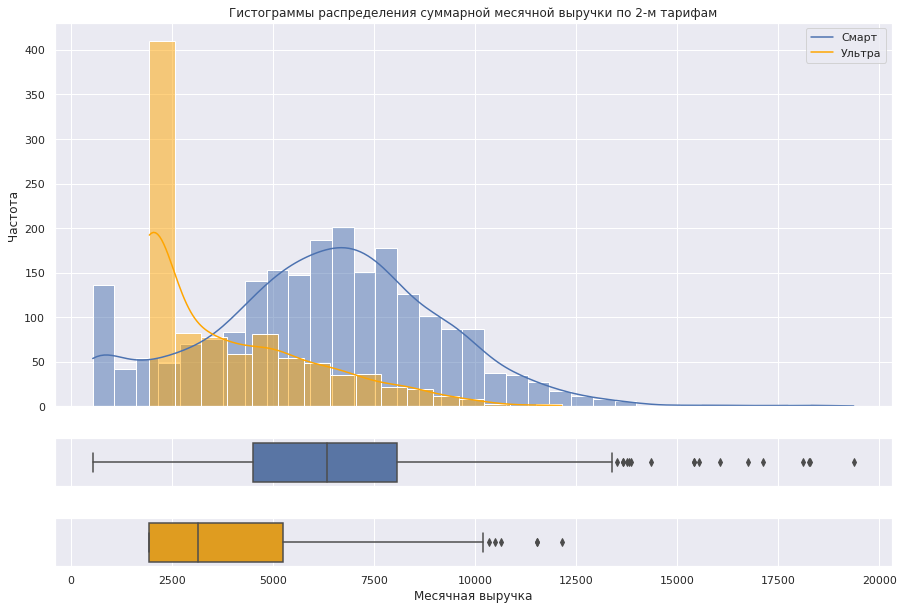

In [557]:
f, [axs_hist, axs_box1, axs_box2] = plt.subplots(3, 1,
                                     figsize=(15, 10), 
                                     sharex=True,
                                     gridspec_kw=dict(height_ratios=[8,1,1]))

sns.histplot(data=total_smart.loc[:, 1:12].values.flatten(), ax=axs_hist, kde=True)
hist = sns.histplot(data=total_ultra.loc[:, 1:12].values.flatten(), ax=axs_hist, 
                    color='orange', kde=True)
hist.set(title='Гистограммы распределения суммарной месячной выручки по 2-м тарифам',
     ylabel='Частота')

hist.legend(labels=['Смарт','Ультра'])

bp = sns.boxplot(data=total_smart.loc[:, 1:12].values.flatten(), orient='h', ax=axs_box1)
bp.set_yticklabels([])

bp = sns.boxplot(data=total_ultra.loc[:, 1:12].values.flatten(), orient='h', ax=axs_box2, color='orange')

bp.set(xlabel='Месячная выручка')
bp.set_yticklabels([]);

Великолепно! Из новых графиков видно, что распределения выручки по пользователям не очень похожи на нормальные и имеют длинные правые "хвосты". Обе гистограммы демонстрируют, что часто пользователи обоих тарифов не выходят за лимиты и платят только за базовые услуги (большие значения крайних левых столбцов графиков).

### Вывод
Пользователи тарифа _ultra_ в среднем в месяц разговаривают дольше, отправляют больше сообщений и используют больший объём трафика, чем пользователи тарифа _smart_.

|          | Смарт     | Ультра |
|--------------|-----------|------------|
| Сред. продолжит. звонков в мес. (мин) | 421      | 547        |
| Сред. количество сообщений в мес. (шт)      | 38  | 65       |
| Сред. объём трафика в мес. (Гб)     | 42  | 39        |

Для графического сравненения поведения пользователей разных тарифов были построены гистограммы распределения суммарной длительности звонков, числа сообщений, объёма трафика и общей выручки по месяцам. Видно, что полученные распределения не похожи на нормальные (за исключением распределения объёма интернет-трафика), имеют асимметричный характер.

Посмотрим, есть ли пользователи, которые не отправляют сообщения вообще и много ли их.

In [558]:
messages_month_count.loc[:, 1:12].sum(axis=1).sort_values().head()

user_id
1141    1.0
1159    2.0
1074    3.0
1279    5.0
1111    6.0
dtype: float64

Похоже, что таких пользователей нет. Даже пользователь с id=1141 хоть одно сообщение, да отправил.

## Проверка гипотез

### Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформилируем нулевую гипотезу $H_0$ следующим образом: средние затрат пользователей тарифов «Ультра» и «Смарт» равны между собой. Тогда альтернативная гипотеза $H_1$ будет звучать так: средние затрат генеральной совокупности «пользователи тарифа «Ультра» и генеральной совокупности «пользователи тарифа «Смарт» различаются.
Пусть пороговый уровень значимости $\alpha = 5 \%$.

In [559]:
alpha = 0.05
ultra_sample = total_ultra.loc[:, 1:12].mean(axis=1)
smart_sample = total_smart.loc[:, 1:12].mean(axis=1)

In [560]:
results = st.ttest_ind(ultra_sample, smart_sample, equal_var=False)

In [561]:
print('p-значение: ', results.pvalue)

p-значение:  8.745574702860225e-31


In [562]:
if results.pvalue > alpha:
    print('Гипотезу H_0 необходимо принять')
else:
    print('Гипотезу H_0 нужно отклонить')

Гипотезу H_0 нужно отклонить


#### Вывод

Между оценками средних генеральных совокупностей наблюдается статистически значимая разница, гипотезу $H_0$ необходимо отклонить, гипотезу $H_1$ необходимо принять.

### Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформилируем нулевую гипотезу $H_0$ следующим образом: средние затрат пользователей из Москвы и из других регионов равны. Тогда альтернативная гипотеза $H_1$ будет звучать так: средние затрат генеральной совокупности «пользователи из Москвы» и генеральной совокупности «пользователи не из Москвы» различаются.
Пусть пороговый уровень значимости $\alpha = 5 \%$

In [563]:
total = total.join(users[['user_id', 'city']].set_index('user_id'))

In [564]:
moscow_sample = total.loc[total['city'] == 'Москва', 1:12].mean(axis=1)
others_sample = total.loc[total['city'] != 'Москва', 1:12].mean(axis=1)

In [565]:
results_msk = st.ttest_ind(moscow_sample, others_sample, equal_var=False)

In [566]:
print('p-значение: ', results_msk.pvalue)

p-значение:  0.26426975551827886


In [567]:
if results_msk.pvalue > alpha:
    print('Гипотезу H0 необходимо принять')
else:
    print('Гипотезу H0 нужно отклонить')

Гипотезу H0 необходимо принять


#### Вывод

Между оценками средних генеральных совокупностей пользователей из Москвы и из других регионов статистически значимой разницы не наблюдается, гипотезу $H_0$ необходимо принять.

### Общий вывод по проверке гипотез

Были проведены два эксперимента для проверки гипотез: правда ли, что средняя выручка для пользователей тарифов _smart_ и _ultra_ различается, правда ли, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Для каждого эксперимента были сформулированы нулевые и двусторонние альтернативные гипотезы. Гипотезы формулировались исходя из условий задач. Для обоих экспериментов был выбран уровень значимости $\alpha = 5 \%$. Уровень значимости был выбран с учётом того, что совершение ошибки второго рода не будет иметь критических последствий.

Эксперименты показали, что средняя выручка для пользователей тарифов _smart_ и _ultra_ различается, а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод по проекту


Имеются несколько наборов данных от федерального оператора сотовой связи «Мегалайн». Клиентам «Мегалайна» доступны два тарифа: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет необходимо установить, какой тариф приносит компании больше денег.

Мы установили, что пользователи тарифа _ultra_ в среднем в месяц разговаривают дольше, отправляют больше сообщений и используют больший объём трафика, чем пользователи тарифа _smart_.

|          | Смарт     | Ультра |
|--------------|-----------|------------|
| Сред. продолжит. звонков в мес. (мин) | 421      | 547        |
| Сред. количество сообщений в мес. (шт)      | 38  | 65       |
| Сред. объём трафика в мес. (Гб)     | 42  | 39        |

В результате анализа данных была показана статистически значимая разница между уровнями месячных расходов клиентов компании с тарифом _ultra_ и _smart_. Исходя из результатов анализа можно сделать вывод, что клиенты с тарифом _ultra_ приносят компании больше прибыли, что необходимо учитывать при формировании рекламных бюджетов.

Была также проверена гипотеза о том, что ежемесячная прибыль от клиентов из Москвы больше, чем от клиентов из других регионов. В ходе эксперимента подтверждения данной гипотезы обнаружить не удалось.